In [1]:
#Import Dependencies
import pandas as pd #test 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import sqlite3
%matplotlib inline

In [2]:
# Source Location of all data files
data = 'https://covid.ourworldindata.org/data/owid-covid-data.xlsx'
vaccination = 'https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/vaccination.csv'
education ='https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/covid_impact_education.csv'


In [3]:
data_df = pd.read_excel(data)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
data_df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [5]:
hospitalization_data_df = data_df.copy()

In [6]:
#data_df.drop(data_df.columns[data_df.apply(lambda col: col.isnull().sum() > 60,000)], axis=1)
data_df.sample(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48595,NZL,Oceania,New Zealand,2020-07-18,1553.0,3.0,1.286,22.0,0.0,0.000,...,36085.843,NaN,128.797,8.08,14.800,17.200,NaN,2.610,82.29,0.931
13007,CPV,Africa,Cape Verde,2020-08-29,3778.0,33.0,46.143,39.0,1.0,0.286,...,6222.554,NaN,182.219,2.42,2.100,16.500,NaN,2.100,72.98,0.665
49827,NGA,Africa,Nigeria,2020-11-10,64336.0,152.0,166.143,1160.0,2.0,1.286,...,5338.454,NaN,181.013,2.42,0.600,10.800,41.949,NaN,54.69,0.539
32230,OWID_INT,NaN,International,2020-10-03,721.0,0.0,0.000,15.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10320,BRN,Asia,Brunei,2020-08-29,144.0,0.0,0.143,3.0,0.0,0.000,...,71809.251,NaN,201.285,12.79,2.000,30.900,NaN,2.700,75.86,0.838
40162,LTU,Europe,Lithuania,2020-03-31,468.0,44.0,43.143,4.0,0.0,0.429,...,29524.265,0.7,342.989,3.67,21.300,38.000,NaN,6.560,75.93,0.882
23051,ETH,Africa,Ethiopia,2021-01-29,136365.0,771.0,497.714,2087.0,2.0,3.857,...,1729.927,26.7,182.634,7.47,0.400,8.500,7.960,0.300,66.60,0.485
75583,ZMB,Africa,Zambia,2021-01-19,39515.0,1308.0,1394.000,578.0,19.0,11.857,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584
8650,BOL,South America,Bolivia,2020-03-11,2.0,2.0,NaN,NaN,NaN,NaN,...,6885.829,7.1,204.299,6.89,NaN,NaN,25.383,1.100,71.51,0.718
60352,SYC,Africa,Seychelles,2020-08-20,132.0,0.0,0.714,NaN,NaN,0.000,...,26382.287,1.1,242.648,10.55,7.100,35.700,NaN,3.600,73.40,0.796


In [7]:
data_df['date'] = pd.to_datetime(data_df['date'])#
data_df['date'] = data_df['date'].dt.strftime('%m/%d/%Y')#, format='%Y%m%d', errors='ignore')
data_df.sample(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48713,NZL,Oceania,New Zealand,11/13/2020,1998.0,3.0,3.143,25.0,0.0,0.000,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
21431,GNQ,Africa,Equatorial Guinea,09/27/2020,5028.0,0.0,3.714,83.0,0.0,0.000,...,22604.873,NaN,202.812,7.78,NaN,NaN,24.640,2.10,58.74,0.592
47761,NPL,Asia,Nepal,05/21/2020,457.0,30.0,29.714,3.0,1.0,0.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.30,70.78,0.602
36401,KEN,Africa,Kenya,03/04/2021,107329.0,528.0,324.571,1870.0,4.0,3.286,...,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.40,66.70,0.601
75659,ZWE,Africa,Zimbabwe,04/05/2020,9.0,0.0,0.286,1.0,0.0,0.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.70,61.49,0.571
22062,EST,Europe,Estonia,05/28/2020,1851.0,11.0,7.286,66.0,0.0,0.286,...,29481.252,0.5,255.569,4.02,24.5,39.3,NaN,4.69,78.74,0.892
56291,RUS,Europe,Russia,03/11/2020,20.0,0.0,2.429,NaN,NaN,0.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
21247,GNQ,Africa,Equatorial Guinea,03/27/2020,12.0,0.0,0.857,NaN,NaN,0.000,...,22604.873,NaN,202.812,7.78,NaN,NaN,24.640,2.10,58.74,0.592
9705,BWA,Africa,Botswana,01/25/2021,20658.0,1004.0,289.714,124.0,19.0,5.143,...,15807.374,NaN,237.372,4.81,5.7,34.4,NaN,1.80,69.59,0.735
6694,BLR,Europe,Belarus,03/14/2020,27.0,0.0,3.000,NaN,NaN,0.000,...,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.00,74.79,0.823


In [8]:
## Data by Country/Location USING
data_df[['iso_code', 'continent', 'location', 'tests_units']] = data_df[['iso_code', 'continent', 'location', 'tests_units']].astype(str)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,02/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,02/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,02/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,02/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,02/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [9]:
### General COVID DATA USING 
covid = data_df[['total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases','population_density','aged_65_older','gdp_per_capita','cardiovasc_death_rate',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
#covid.head()

,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,NaN,1.0,1.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
1,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
2,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
3,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
4,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511


In [10]:
correlation_matrix = covid.corr()
print(correlation_matrix)

                            total_vaccinations  people_vaccinated  \
total_vaccinations                    1.000000           0.985846   
people_vaccinated                     0.985846           1.000000   
total_deaths                          0.775719           0.787186   
total_cases                           0.785431           0.790236   
new_cases                             0.526899           0.534707   
population_density                   -0.033743          -0.039467   
aged_65_older                        -0.085668          -0.104349   
gdp_per_capita                       -0.055560          -0.059893   
cardiovasc_death_rate                 0.009079           0.004253   
diabetes_prevalence                   0.061349           0.079705   
hospital_beds_per_thousand           -0.092173          -0.114403   
life_expectancy                      -0.133496          -0.135865   
human_development_index              -0.097037          -0.102921   

                            total

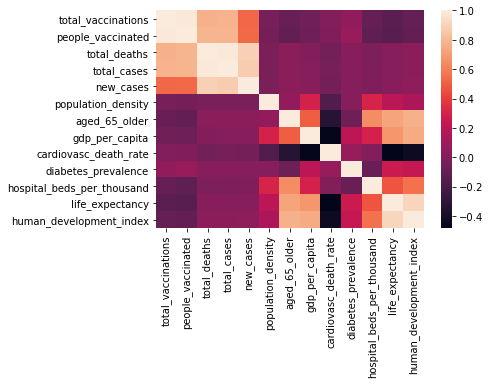

In [11]:
sn.heatmap(correlation_matrix)
plt.show()

In [12]:
data_df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [15]:
data_df.isna().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                               1294
new_cases                                 1296
new_cases_smoothed                        2297
total_deaths                             10573
new_deaths                               10415
new_deaths_smoothed                       2297
total_cases_per_million                   1701
new_cases_per_million                     1703
new_cases_smoothed_per_million            2699
total_deaths_per_million                 10967
new_deaths_per_million                   10809
new_deaths_smoothed_per_million           2699
reproduction_rate                        14892
icu_patients                             68078
icu_patients_per_million                 68078
hosp_patients                            66458
hosp_patients_per_million                66458
weekly_icu_ad

In [16]:
## Use for #3 
### use both jupyter and Tableau 
vaccination_df = pd.read_csv(vaccination, delimiter=',', skiprows=0, low_memory=False)
vaccination_df = vaccination_df.drop(vaccination_df.index[0])
#vaccination_df.drop(axiloc[:0]
vaccination_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,Albania,ALB,2021-01-10,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
2,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,22.0
3,Albania,ALB,2021-01-12,128,128.0,NaN,NaN,64,0.00,0.00,NaN,22.0
4,Albania,ALB,2021-01-13,188,188.0,NaN,60.0,63,0.01,0.01,NaN,22.0
5,Albania,ALB,2021-01-14,266,266.0,NaN,78.0,66,0.01,0.01,NaN,23.0


In [17]:
vaccination_df.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                      object
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                      object
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

In [18]:
#data_df['date'] = pd.to_datetime(data_df['date'])#
#data_df['date'] = data_df['date'].dt.strftime('%m/%d/%Y')

vaccination_df['date'] = pd.to_datetime(vaccination_df['date'],infer_datetime_format = True)#.apply(pd.to_datetime)#.dt.strftime('%m/%d/%Y')
vaccination_df['date'] = vaccination_df['date'].dt.strftime('%m/%d/%Y')
#vaccination_df['date'].sample(3)

In [19]:
## Vaccinations by Country and Date USING
vaccination_df.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,Albania,ALB,01/10/2021,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
2,Albania,ALB,01/11/2021,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,22.0
3,Albania,ALB,01/12/2021,128,128.0,NaN,NaN,64,0.00,0.00,NaN,22.0
4,Albania,ALB,01/13/2021,188,188.0,NaN,60.0,63,0.01,0.01,NaN,22.0
5,Albania,ALB,01/14/2021,266,266.0,NaN,78.0,66,0.01,0.01,NaN,23.0


In [20]:
education1 = pd.read_csv(education,  delimiter=',', skiprows=0, low_memory=False,error_bad_lines=False)
education1.head()

,Date,ISO,Country,Status,Note
0,16/02/2020,ABW,Aruba,Fully open,NaN
1,16/02/2020,AFG,Afghanistan,Fully open,NaN
2,16/02/2020,AGO,Angola,Fully open,NaN
3,16/02/2020,AIA,Anguilla,Fully open,NaN
4,16/02/2020,ALB,Albania,Fully open,NaN


In [21]:
education1.dtypes

Date       object
ISO        object
Country    object
Status     object
Note       object
dtype: object

In [22]:
# ChangeDates to date time for all dataset
education1['Date'] = pd.to_datetime(education1['Date'])
education1['Date'] = education1['Date'].dt.strftime('%m/%d/%Y')
education1.head()

,Date,ISO,Country,Status,Note
0,02/16/2020,ABW,Aruba,Fully open,NaN
1,02/16/2020,AFG,Afghanistan,Fully open,NaN
2,02/16/2020,AGO,Angola,Fully open,NaN
3,02/16/2020,AIA,Anguilla,Fully open,NaN
4,02/16/2020,ALB,Albania,Fully open,NaN


In [23]:
education1.dtypes

Date       object
ISO        object
Country    object
Status     object
Note       object
dtype: object

In [24]:
education1[['iso_code', 'date']] = education1[['ISO', 'Date']]
education1.head()

,Date,ISO,Country,Status,Note,iso_code,date
0,02/16/2020,ABW,Aruba,Fully open,NaN,ABW,02/16/2020
1,02/16/2020,AFG,Afghanistan,Fully open,NaN,AFG,02/16/2020
2,02/16/2020,AGO,Angola,Fully open,NaN,AGO,02/16/2020
3,02/16/2020,AIA,Anguilla,Fully open,NaN,AIA,02/16/2020
4,02/16/2020,ALB,Albania,Fully open,NaN,ALB,02/16/2020


In [25]:
education_df = education1.drop(columns=["ISO",], axis=1)
education_df.head()

,Date,Country,Status,Note,iso_code,date
0,02/16/2020,Aruba,Fully open,NaN,ABW,02/16/2020
1,02/16/2020,Afghanistan,Fully open,NaN,AFG,02/16/2020
2,02/16/2020,Angola,Fully open,NaN,AGO,02/16/2020
3,02/16/2020,Anguilla,Fully open,NaN,AIA,02/16/2020
4,02/16/2020,Albania,Fully open,NaN,ALB,02/16/2020


In [26]:
## School Status for Country by date
education_new_df = education_df.drop(columns=["Date"], axis=1)
education_new_df.head()

,Country,Status,Note,iso_code,date
0,Aruba,Fully open,NaN,ABW,02/16/2020
1,Afghanistan,Fully open,NaN,AFG,02/16/2020
2,Angola,Fully open,NaN,AGO,02/16/2020
3,Anguilla,Fully open,NaN,AIA,02/16/2020
4,Albania,Fully open,NaN,ALB,02/16/2020


In [27]:
covid = data_df[['total_vaccinations','people_vaccinated', 'total_cases','new_cases','stringency_index','population','population_density','median_age','aged_65_older',	'aged_70_older',	'gdp_per_capita',	'extreme_poverty','cardiovasc_death_rate',	'diabetes_prevalence','female_smokers',	'male_smokers',	'handwashing_facilities','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid.head()


,total_vaccinations,people_vaccinated,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,1.0,1.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [28]:
### USING 
covid_youth = data_df[['iso_code', 'date','total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases', 'new_deaths','population_density','gdp_per_capita', 'handwashing_facilities',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid_youth.head()

,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,02/24/2020,NaN,NaN,NaN,1.0,1.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
1,AFG,02/25/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
2,AFG,02/26/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
3,AFG,02/27/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
4,AFG,02/28/2020,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511


In [29]:
### Left Merge on Education and COVID data on iso_code and date
merged_left_df = pd.merge(left=education_new_df, right=covid_youth, how="left", on=["iso_code", "date"])

In [30]:
merged_left_df.head()

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Aruba,Fully open,NaN,ABW,02/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Fully open,NaN,AFG,02/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Fully open,NaN,AGO,02/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,Fully open,NaN,AIA,02/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Fully open,NaN,ALB,02/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merged_left_df.isna().sum()

Country                           0
Status                            0
Note                          85286
iso_code                          0
date                              0
total_vaccinations            83311
people_vaccinated             83647
total_deaths                  32723
total_cases                   24992
new_cases                     24993
new_deaths                    32723
population_density            25014
gdp_per_capita                26497
handwashing_facilities        55830
diabetes_prevalence           24809
hospital_beds_per_thousand    30655
life_expectancy               24351
human_development_index       25619
dtype: int64

In [32]:
merged_left_df = merged_left_df.fillna(0)
merged_left_df.sample(20)

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
75864,Dominican Republic,Closed due to COVID-19,0,DOM,11/02/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
36490,Saudi Arabia,Academic break,0,SAU,07/08/2020,0.0,0.0,2059.0,220144.0,3036.0,42.0,15.322,49045.411,0.000,17.72,2.70,75.13,0.854
7709,Palau,Closed due to COVID-19,0,PLW,03/23/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
53793,Switzerland,Fully open,0,CHE,10/29/2020,0.0,0.0,2200.0,145044.0,9386.0,42.0,214.243,57410.166,0.000,5.59,4.53,83.78,0.955
60704,Belgium,Fully open,0,BEL,01/12/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
47805,Niger,Academic break,0,NER,09/30/2020,0.0,0.0,69.0,1197.0,1.0,0.0,16.955,926.000,8.978,2.42,0.30,62.42,0.394
35366,India,Closed due to COVID-19,0,IND,02/08/2020,0.0,0.0,0.0,3.0,0.0,0.0,450.419,6426.674,59.550,10.39,0.53,69.66,0.645
43026,Tokelau,Fully open,0,TKL,07/09/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
4100,Sri Lanka,Fully open,0,LKA,06/03/2020,0.0,0.0,11.0,1749.0,66.0,0.0,341.955,11669.077,0.000,10.68,3.60,76.98,0.782
59979,Mauritania,Fully open,0,MRT,11/27/2020,0.0,0.0,172.0,8424.0,136.0,1.0,4.289,3597.633,15.950,2.42,0.00,64.92,0.546


# TEST
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_left_df['date']
# Add x-axis and y-axis
ax.scatter(merged_left_df.index.values,
        merged_left_df['total_cases'],
        color='red')
# Set title and labels for axes
ax.set(xlabel="date",
       ylabel="Total Number of COVID-19 Cases",
       title="Global COVID-19 Cases")
plt.show()

In [33]:
 # Remove date element
 merged_left_df.groupby(["iso_code"]).sum()

,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.000
AFG,62200.0,62200.0,402160.0,10782053.0,50540.0,2184.0,18666.746,618767.541,12946.878,3289.37,171.50,22236.69,175.273
AGO,49000.0,49000.0,59101.0,2290721.0,19186.0,456.0,7644.800,1862238.400,8532.480,1260.80,0.00,19568.00,185.920
AIA,13032.0,13032.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,1637.60,0.000
ALB,93331.0,13684.0,162922.0,8055123.0,95327.0,1696.0,35865.882,4036773.402,0.000,3447.36,988.38,26870.94,271.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,0.0,201.0,3.0,0.0,6455.409,560004.801,0.000,856.53,0.00,6818.76,66.495
YEM,0.0,0.0,134543.0,475134.0,2658.0,661.0,16105.908,445223.247,14912.142,1610.35,210.70,19902.12,141.470
ZAF,1597802.0,1597802.0,5074661.0,188925516.0,1286407.0,42721.0,16691.178,4389270.732,15705.501,1970.64,828.24,22894.41,253.113


All data for databases

In [38]:
### All Data for Viz and analysis. Left Merge on Vaccination and merged_left_df on iso_code and date
all_data_df = pd.merge(left=vaccination_df, right=merged_left_df, how="right", on=["iso_code", "date"])
all_data_df = all_data_df.fillna(0)
all_data_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,ABW,02/16/2020,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,AFG,02/16/2020,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,AGO,02/16/2020,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,AIA,02/16/2020,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,ALB,02/16/2020,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Output data files 
data_df.to_csv(r'covid_location_data_improved.csv', index=False)
covid.to_csv(r'main_covid_data_improved.csv', index=False)
vaccination_df.to_csv(r'vaccination_improved.csv', index=False)
education_new_df.to_csv(r'covid_education_improved.csv', index=False)
covid_youth.to_csv(r'covid_youth_improved.csv', index=False)


In [39]:
#Compare hospitalization and vaccination data
all_data_df.to_csv(r'all_map_data.csv',index=False)